- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

#### Импорт библиотек, первичный вывод таблицы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Вывод общей информации для наглядности

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видим большое количество пропусков

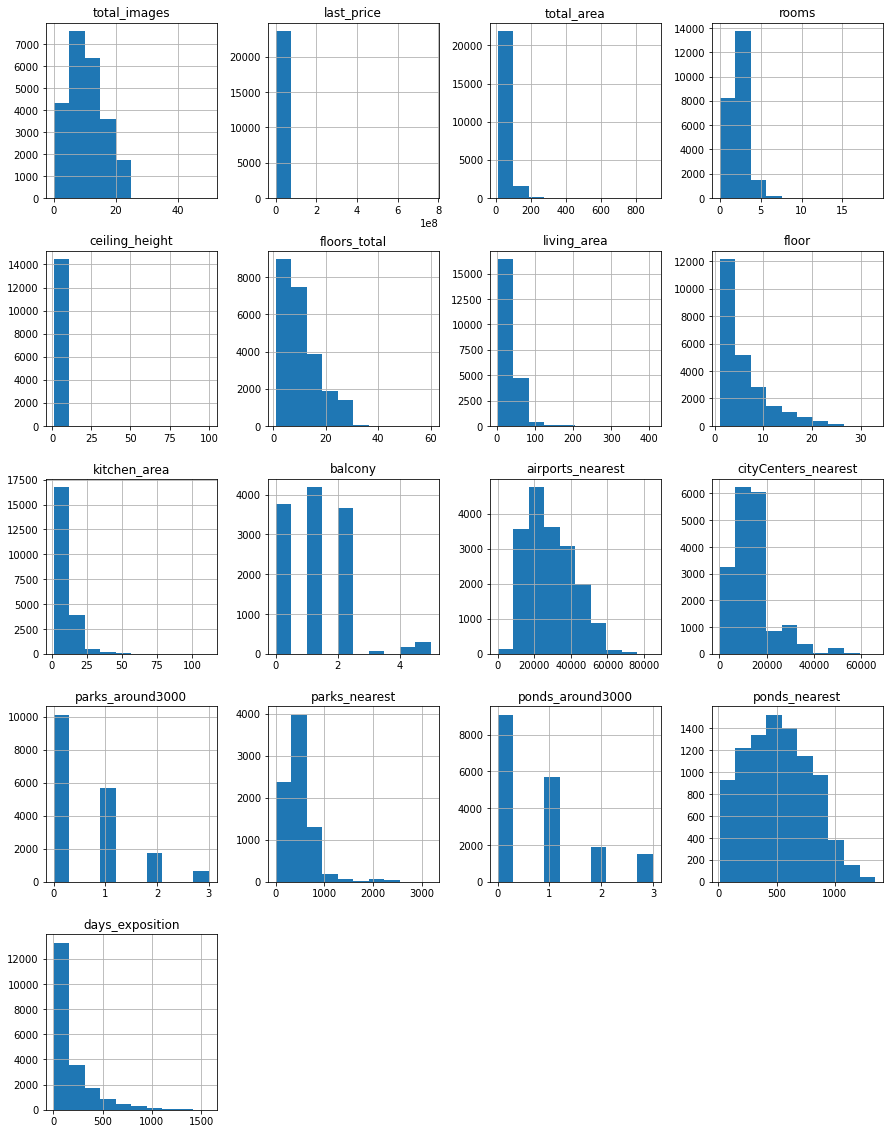

In [3]:
data.hist(figsize=(15, 20));

#### Изучим пропущенные значения

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

##### Как мы можем заметить, самое большое количество пропусков в разделе, обозначающем жилое/нежилое помещение. Их так много ввиду того, что в основном люди продают и покупают именно жилье, а не коммерческие помещения. Так же много пропусков с информацией о наличии балкона, ближайших парках и водоемах. Предлагаю пометить информацию о балконах, парках и водоемах нулями, а жилое/нежилое помещение вместо NaN, False. 

### Предобработка данных

#### Заполним пропущенные значения

In [5]:
data['is_apartment'].fillna(False, inplace=True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
data['balcony'].fillna(0, inplace=True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Вероятно, если человек не указал количество балконов, их попросту нет в квартире. 

В этом коде мы создаем новый столбец 'XXX_nearest_median', который содержит медианные значения расстояний до ближайших парков для каждого города. Затем мы объединяем этот столбец с исходным data, используя столбец 'locality_name' как ключ. Пропущенные значения в 'XXX_nearest' заменяются на соответствующие медианные значения, а затем временный столбец 'XXX_nearest_median' удаляется.

###### Причинами того, почему люди не заполняют пункт связанный с апартаментами заключается в том, что человек, выкладывающий квартиру, когда видит в анкете вопрос с мелькающим словом АПАРТАМЕНТЫ, просто пропускает его, так как считает подсознательно, что его квартира к этому вопросу не относится. Насчет балконов, парков и водоемов, вероятно ничего этого по близости нет. 

#### Смотрим и сверяем типы данных

In [7]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

##### В первую очередь хочется привести дату к типу datetime, а далее идти по порядку

In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [9]:
data['last_price'].sum() #как мы можем видеть, никто не указывает стоимость дробными числами, значит её можно перевести к int
data['last_price'] = data['last_price'].astype('int')

In [10]:
data['floors_total'].sum() # аналогично с количеством этажей в доме, но если количество не указано, дом одноэтажный
data['floors_total'] = data['floors_total'].fillna('1')
data['floors_total'] = data['floors_total'].astype('int')

In [11]:
data['balcony'].sum() # балконов также не может быть дробное количество
data['balcony'] = data['balcony'].astype('int')

In [12]:
# короче мы все, что связано с количеством далее приведем к int
data['parks_around3000'] = data['parks_around3000'].fillna('0')
data['parks_around3000'] = data['parks_around3000'].astype('int')

In [13]:
data['ponds_around3000'] = data['ponds_around3000'].fillna('0')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [14]:
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                float64
dtype: object

##### Таким образом мы привели все предшествующие типы данных к более логичным. Там, где было логично привести к int (а-ля количествА чего-либо), мы привели. Там, где количество этажей во всем доме не указано, логично предположить, что это либо дом, либо какое-то одноэтажное здание, либо все-таки дом, но это помещение находится на первом этаже и поэтому автор объявления посчитал, что эта информация необязательная. 

#### Изучим и удалим дубликаты

In [15]:
data.duplicated().sum()

0

In [16]:
data['locality_name'].duplicated().sum()

23334

In [17]:
data['locality_name'].nunique()

364

In [18]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [19]:
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('городской посёлок ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('посёлок ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('городской поселок ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('коттеджный посёлок ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('посёлок при железнодорожной станции ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('село ', '', regex=True) 

In [20]:
data['locality_name'].nunique()

316

##### Я посчитал нужным не просто поменять ё на е, а скорее даже удалить эти бессмысленные приставленные к названиям города слова. Сделано для того, чтобы остались конкретно только НАЗВАНИЯ населенных пунктов. Так как в одном объявлении могло быть указано коттеджный поселок XXX, а в другом месте просто поселок XXX, хотя по сути это одно и то же по мнению двух авторов. 

#### Займемся поисков аномальных значений

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

##### ситуация с ценой очень интересная, так как количество аномальных значений зашкаливает

##### Обратим внимание на следующие столбцы: 1. Стоимость квартиры 2. Высота потолков 3. Количество комнат 4. Общая площадь

СТОИМОСТЬ

<AxesSubplot:>

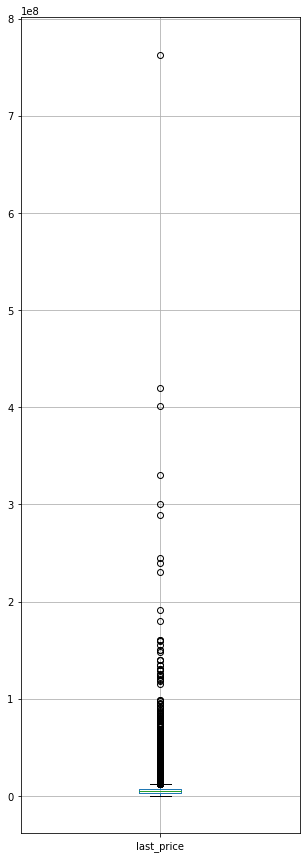

In [22]:
data.boxplot(column='last_price', figsize= (5, 15))

In [23]:
Q1_price = data['last_price'].quantile(0.25)
Q3_price = data['last_price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
data = data[(data['last_price'] >= lower_bound_price) & (data['last_price'] <= upper_bound_price)]

ПОТОЛКИ

<AxesSubplot:>

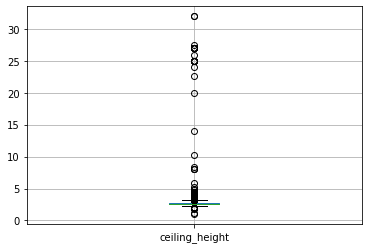

In [24]:
data.boxplot(column='ceiling_height')

In [25]:
data['ceiling_height'] = data['ceiling_height'].replace({
    25.0: 2.5,
    27.0: 2.7,
    32.0: 3.2,
    24.0: 2.4,
    26.0: 2.6,
    20.0: 2.0,
    27.5: 2.75
})

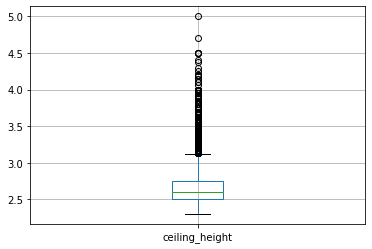

In [26]:
data = data[(data['ceiling_height'].isna()) | ((data['ceiling_height'] >= 2.3) \
                                             & (data['ceiling_height'] <= 5))]
data.boxplot('ceiling_height');

КОЛИЧЕСТВО КОМНАТ (с ними вроде все гуд)

<AxesSubplot:>

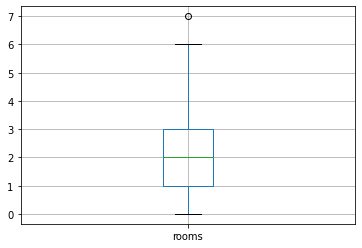

In [27]:
data.boxplot(column='rooms')

ОБЩАЯ ПЛОЩАДЬ

<AxesSubplot:>

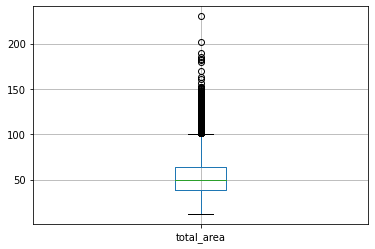

In [28]:
data.boxplot(column='total_area')

In [29]:
data = data[data['total_area'] < 95]

<AxesSubplot:>

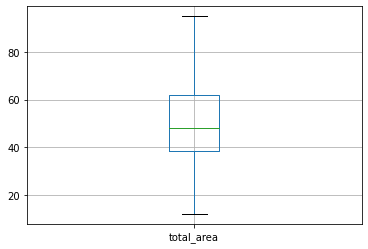

In [30]:
data.boxplot(column='total_area')

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра 

In [31]:
data['price_per_m'] = data['last_price'] / data['total_area']

#### День публикации объявления

In [32]:
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek + 1

#### Месяц публикации объявления

In [33]:
data['month'] = data['first_day_exposition'].dt.month

#### Год публикации

In [34]:
data['year'] = data['first_day_exposition'].dt.year

#### Тип этажа квартиры

In [35]:
def get_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [36]:
data['floor_type'] = data.apply(get_floor_type, axis=1)

Простенькая функция для классификации этажа

#### Расстояние в км до центра города

In [37]:
data['km_to_center'] = round((data['cityCenters_nearest'] / 1000), 1)

### Проведите исследовательский анализ данных

#### Построим гистограммы параметров

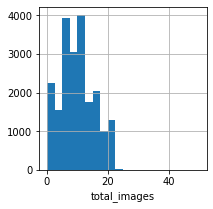

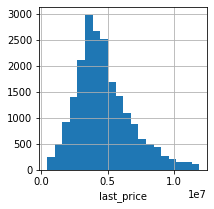

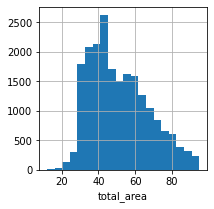

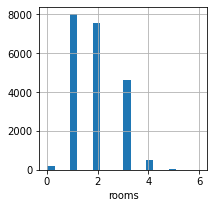

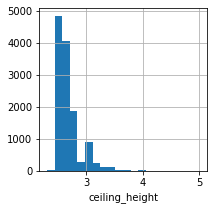

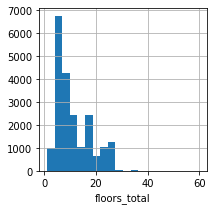

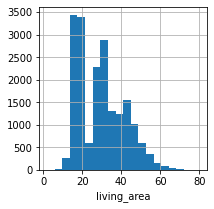

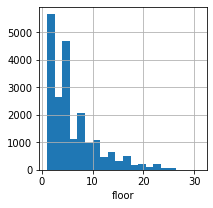

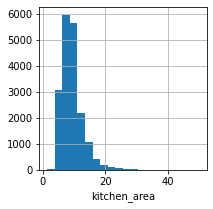

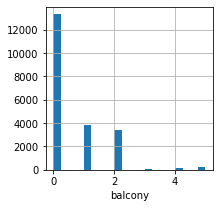

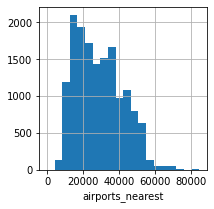

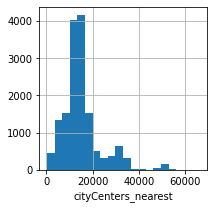

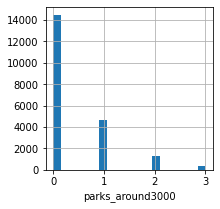

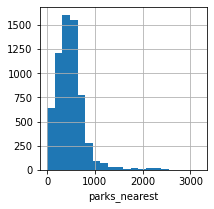

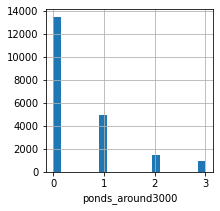

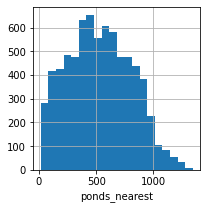

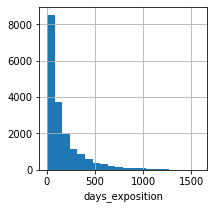

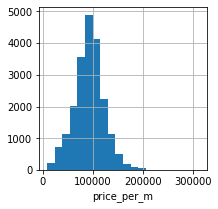

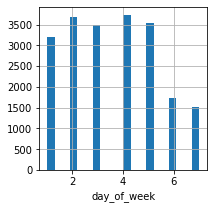

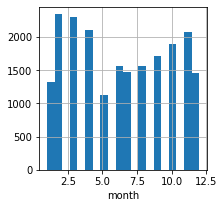

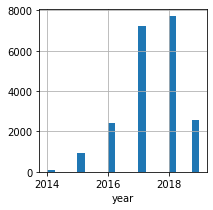

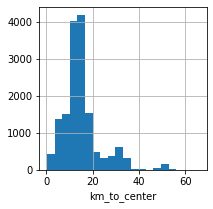

In [38]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns

for column in numeric_columns:
    plt.figure(figsize=(3, 3))
    plt.hist(data[column], bins=20)
    plt.xlabel(column)
    plt.grid(True)
    plt.show()

<AxesSubplot:>

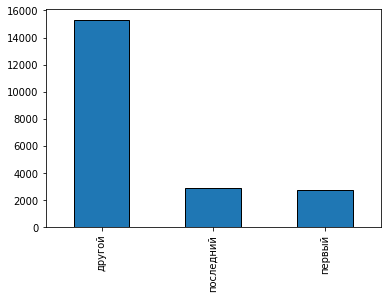

In [39]:
data['floor_type'].value_counts().plot(kind='bar', edgecolor='k')

ВЫВОДЫ ПО СТОЛБЦАМ:

1) total_images - как мы можем видеть распределение в целом похоже на нормальное, в среднем на каждом объявлении порядка ~10 фотографий

2) last_price - в среднем квартиры стоят около 4 млн +- в обе стороны

3) total_area - логичным образом чем больше площадь квартиры тем меньше таких квартир, соответственно больше всего квартир порядка 40-45 квадратных метров

4) rooms - как и в случае с площадью, больше всего небольший квартир, а это 2-3 комнаты, что мы и видим

5) ceiling_height - обычно высота потолков порядка 2.5-2.7 метров

6) floors_total - в основном продаются квартиры в более-менее НЕ новых домах, а это в основном около 9 этажей и меньше

7) living_area - по аналогии с общей площадью квартиры в большинстве своем 1-3 комнатные и площадь соответствующая 

8) floor - большинство продаваемых квартир находится в нижней половине этажности дома

9) kitchen_area - абсолютное большинство квартир обладает стандартным размером кухни порядка 10-15 квадратов

10) balcony - тот случай когда не может быть средних значений, больше всего квартир без балкона

11) airports_nearest - в средем квартиры расположены в 20 км от аэропорта 

12) cityCenters_nearest - в среднем квартиры расположены в 10 с копейками (около 13-15) км от центра города

13) parks_around3000 - у большинства квартир в радиусе 3 км нет ни одного парка

14) parks_nearest - однако по какой-то причине огромное количество квартир у которых парк вблизи 500 метров

15) ponds_around3000 - 
                            почему-то с прудами ситуация аналогичная
16) ponds_nearest - 

17) days_exposisition - обычно квартиры продаются примерно за пару месяцев

18) price_per_m - в среднем стоимость квадратного метра 100.000

19) day_of_week - зависимостей нет, все одинаково

20) month - в целом критичного нет ничего, в основном начало и конец года

21) year - продаются в основном 2017-2018 год

22) km_to_center - как и cityCenters_nearest

23) floor_type - как мы можем видеть абсолютное лидерство за категорией ДРУГОЙ, это довольно очевидно

#### Задание: "Изучите, как быстро продавались квартиры (столбец days_exposition)."

<AxesSubplot:>

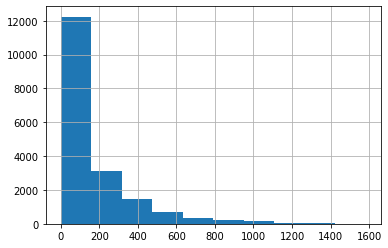

In [40]:
data['days_exposition'].hist()

In [41]:
data['days_exposition'].mean()

170.2606047422232

In [42]:
data['days_exposition'].median()

90.00000000000001

Обычно продажа занимает порядка 100 дней. Безусловно, быстрые продажи - те, которые были осуществлены за срок до 50 дней, а долгие - осуществленные за срок более 150 дней. 

#### Задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."

In [43]:
selected_columns = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']


meaned = data[selected_columns]

In [44]:
meaned.corr().head(1).iloc[:, 1:]

,total_area,living_area,kitchen_area,rooms
last_price,0.663266,0.51783,0.456836,0.391397


<AxesSubplot:xlabel='floor_type'>

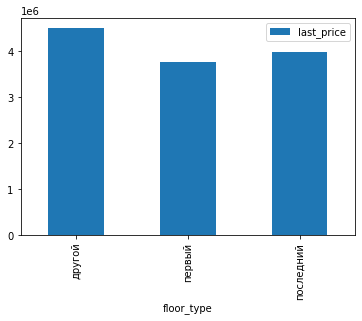

In [45]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot.bar()

<AxesSubplot:xlabel='day_of_week'>

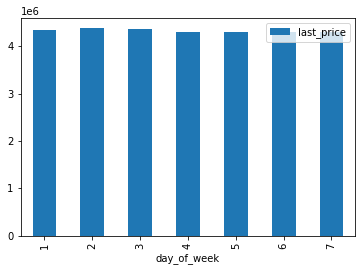

In [46]:
data.pivot_table(index='day_of_week', values='last_price', aggfunc='median').plot.bar()

<AxesSubplot:xlabel='month'>

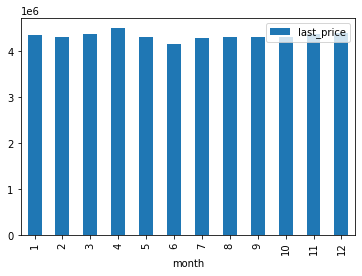

In [47]:
data.pivot_table(index='month', values='last_price', aggfunc='median').plot.bar()

<AxesSubplot:xlabel='year'>

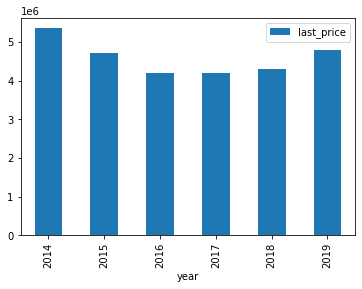

In [48]:
data.pivot_table(index='year', values='last_price', aggfunc='median').plot.bar()

Итог: Стоимость зависит от площади квартиры и кухни (что логично), от жилплощали (что логично), от количества комнат. Глобально тип этажа не влияет на стоимость, однако тип ДРУГОЙ все же чуточку больше. День недели в данном случае не влияет абсолютно никак. Аналогично с месяцем. В случае с годом стоимость очень новых, и "очень старых" объявлений выше чем остальные. Вероятно новые так как новостройки, старые так как очень близко к центру города. 

#### Задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name."

In [49]:
top10 = data['locality_name'].value_counts().head(10)
top10

Санкт-Петербург    13168
Мурино               588
Шушары               429
Всеволожск           385
Колпино              330
Пушкин               329
Парголово            320
Гатчина              299
деревня Кудрово      296
Выборг               218
Name: locality_name, dtype: int64

In [50]:
filtered_data = data[data['locality_name'].isin(top10.index)]

In [51]:
filtered_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,day_of_week,month,year,floor_type,km_to_center
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,2,12,2018,первый,18.6
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,4,8,2015,другой,13.9
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,False,False,14.40,1,Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.710456,4,11,2017,другой,19.1
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.692737,4,4,2019,другой,11.6
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454.764777,3,5,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000,39.00,2017-12-16,1,NaN,9,20.00,6,False,False,False,11.00,2,Санкт-Петербург,40837.0,16704.0,0,NaN,0,NaN,38.0,82051.282051,6,12,2017,другой,16.7
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.30,4,False,False,False,9.10,2,Санкт-Петербург,17284.0,16081.0,1,353.0,2,652.0,29.0,100566.572238,3,2,2018,другой,16.1
23690,3,5500000,52.00,2018-07-19,2,NaN,5,31.00,2,False,False,False,6.00,0,Санкт-Петербург,20151.0,6263.0,1,300.0,0,NaN,15.0,105769.230769,4,7,2018,другой,6.3
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.30,7,False,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0,NaN,1,806.0,519.0,129903.978052,4,10,2016,другой,4.5


In [52]:
top10_per_m = filtered_data.groupby('locality_name')['price_per_m'].mean().sort_values(ascending=False)
top10_per_m

locality_name
Санкт-Петербург    106169.857278
Пушкин             100692.717449
деревня Кудрово     92482.778852
Парголово           90793.306980
Мурино              86145.213913
Шушары              78774.391415
Колпино             75404.044256
Гатчина             68661.103778
Всеволожск          67241.828319
Выборг              58346.029031
Name: price_per_m, dtype: float64

In [53]:
top10_per_m.max()

106169.85727779989

Санкт-Петербург

In [54]:
top10_per_m.min()

58346.02903119594

Выборг

#### Задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

In [55]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,day_of_week,month,year,floor_type,km_to_center
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,2,12,2018,первый,18.6
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,4,8,2015,другой,13.9
5,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,False,False,False,9.1,0,Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.789474,1,9,2018,другой,NaN
6,6,3700000,37.3,2017-11-02,1,NaN,26,10.6,6,False,False,False,14.4,1,Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.710456,4,11,2017,другой,19.1
7,5,7915000,71.6,2019-04-18,2,NaN,24,NaN,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.692737,4,4,2019,другой,11.6


In [56]:
data_only_spb = data[data['locality_name'] == 'Санкт-Петербург']

In [57]:
pivot_table = data_only_spb.pivot_table(index='km_to_center', values='price_per_m', aggfunc=['mean', 'median']).sort_index()
pivot_table.columns = ['Среднее значение', 'Медиана']
pivot_table

,Среднее значение,Медиана
km_to_center,,
0.2,172619.047619,172619.047619
0.3,100000.000000,100000.000000
0.4,145174.216028,145174.216028
0.5,123468.399706,117283.950617
0.6,161999.512671,147000.000000
...,...,...
28.0,83277.489795,79873.546512
28.6,85191.334598,85191.334598
28.8,79890.310786,79890.310786


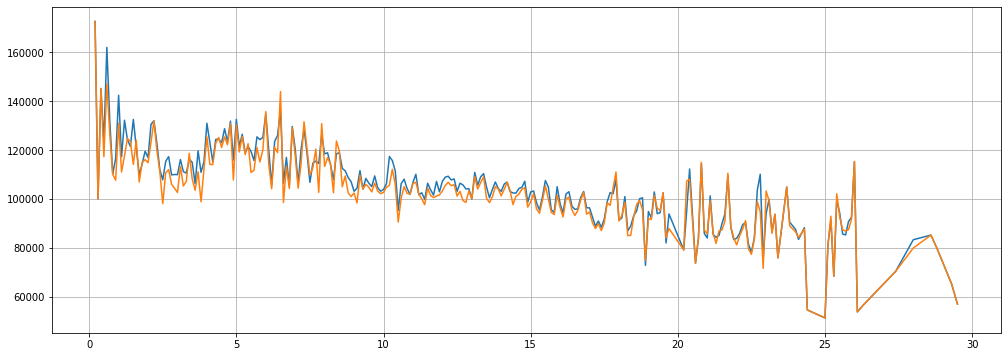

In [58]:
plt.figure(figsize=(17, 6))
plt.plot(pivot_table.index, pivot_table['Среднее значение'])
plt.plot(pivot_table.index, pivot_table['Медиана'])
plt.grid(True)
plt.show()

Как мы можем видеть, есть зависимость между ценой и расстоянием. Однако есть просадка в значении 3. 

### Общий вывод

ЦЕЛИ ПРОЕКТА:

Автоматизировать выявление зависимостей между десятками параметров и стоимостью недвижимости в Санкт-Петербурге и Ленобласти, сочетая при этом два вида полученных данных: 1) данные, полученные и введенные вручную специалистами. 2) данные, которые были получены облачными геосервисами без участия человека. Помимо установления зависимостей нам было важно определить насколько хорошо справляются оба источника информации со своей работой. 

РАБОТА НАД ПРОЕКТОМ: 
1. Изучение данных: Первым шагом в проекте является изучение данных в датафрейме. Это включает в себя ознакомление с структурой данных, выявление основных переменных (столбцов) и их типов, а также определение наличия пропущенных значений и выбросов.

2. Подготовка данных: Произведение необходимых манипуляций с данными, таких как обработка пропущенных значений, удаление дубликатов, преобразование данных в удобные форматы (например, даты), создание новых признаков (например, цена за квадратный метр).

3. Исследовательский анализ данных (EDA): Анализ основных статистических характеристик данных, построение графиков и визуализаций для выявления паттернов и зависимостей. Это включает в себя анализ стоимости квартир, их площади, этажности, удаленности от центра и других параметров.

4. Изучение влияния факторов: Анализ влияния различных факторов (например, близость к паркам) на стоимость квартир с использованием корреляций и прочего.

5. Выводы и рекомендации: Сформулирование обобщенных выводов на основе анализа данных и предложение рекомендаций для потенциальных покупателей и продавцов недвижимости. Например, выявление наиболее привлекательных районов (населенных пунктов) или определение факторов, влияющих на стоимость квартир.

ИТОГ ИССЛЕДОВАТЕЛЬСКОГО ПРОЕКТА:

Результаты исследования помогут лучше понять рынок недвижимости в Санкт-Петербурге и области, выявить факторы, влияющие на стоимость квартир, и предоставить ценную информацию для принятия решений как потенциальными покупателями, так и продавцами. Проект также может служить основой для дальнейших аналитических исследований в сфере недвижимости.